In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#read in file
df = pd.read_csv("../data/stroke_data_raw.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#check for null data
df.info()

#since we have a large amount of data, dropping all rows without a bmi count is favorable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#drop all NaN BMIs
temp = df[df['bmi'].isna() == False]
print(temp.info()) #check

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB
None


In [ ]:
df.describe()

#it appears that our age column has an extremely wide range [0.08, 82]. having a lower bound this low can be confusing to model later on. something to look out for.

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


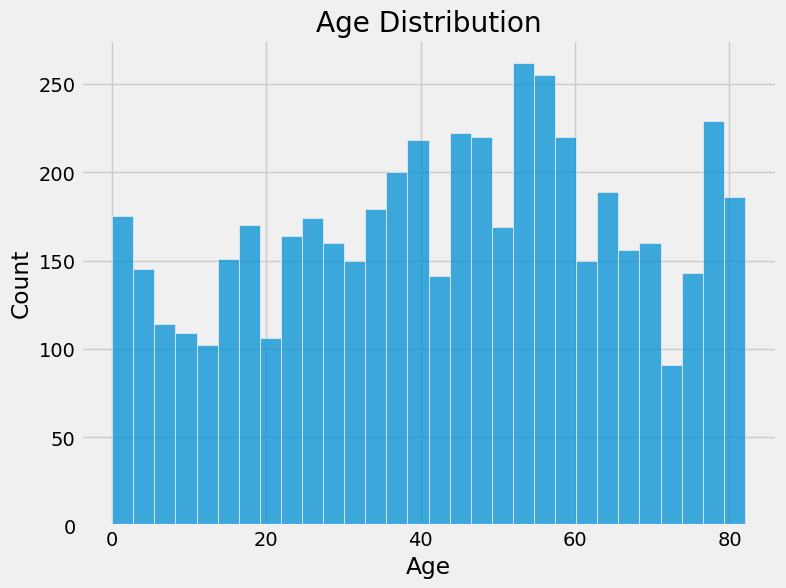

In [ ]:
#visualize age distribution
sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#our data contains a diverse amount of data from all age groups.

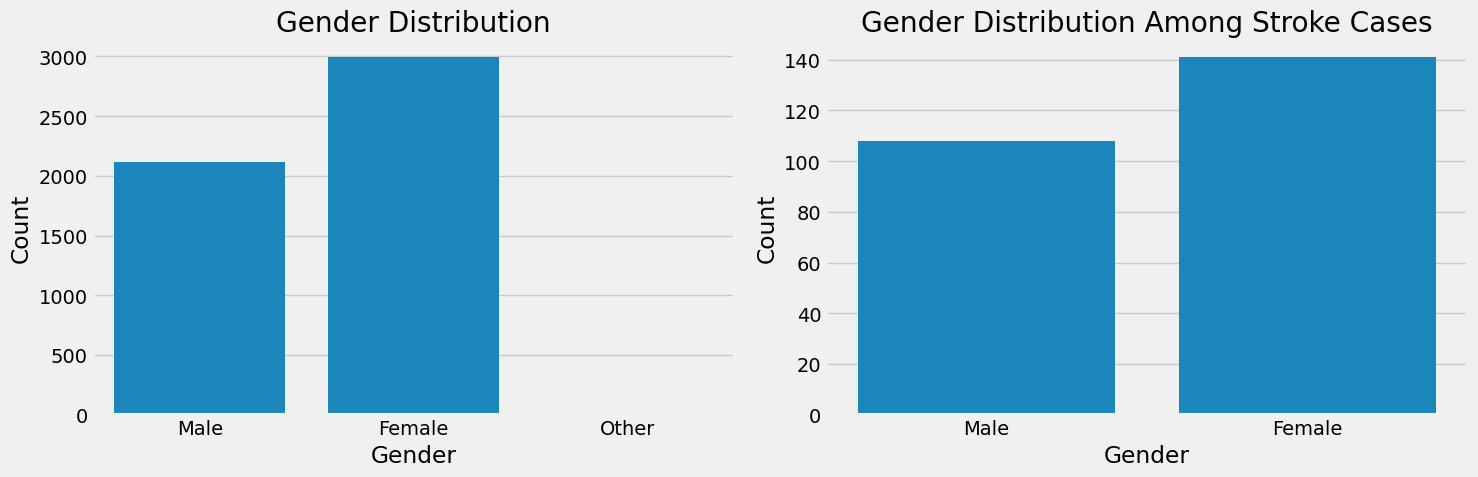

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#female to male ratio
sns.countplot(data = df, x = 'gender', ax = axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

stroke_df = df[df['stroke'] == 1] # collect only people who have reported a stroke
sns.countplot(data = stroke_df, x = 'gender', ax = axes[1])
axes[1].set_title('Gender Distribution Among Stroke Cases')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#female dominated dataset. the majority of reported strokes are female as well.

In [ ]:
#precise values
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [ ]:
#stroke amount
print(df['stroke'].value_counts())
print()
#count per job
print(df['work_type'].value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


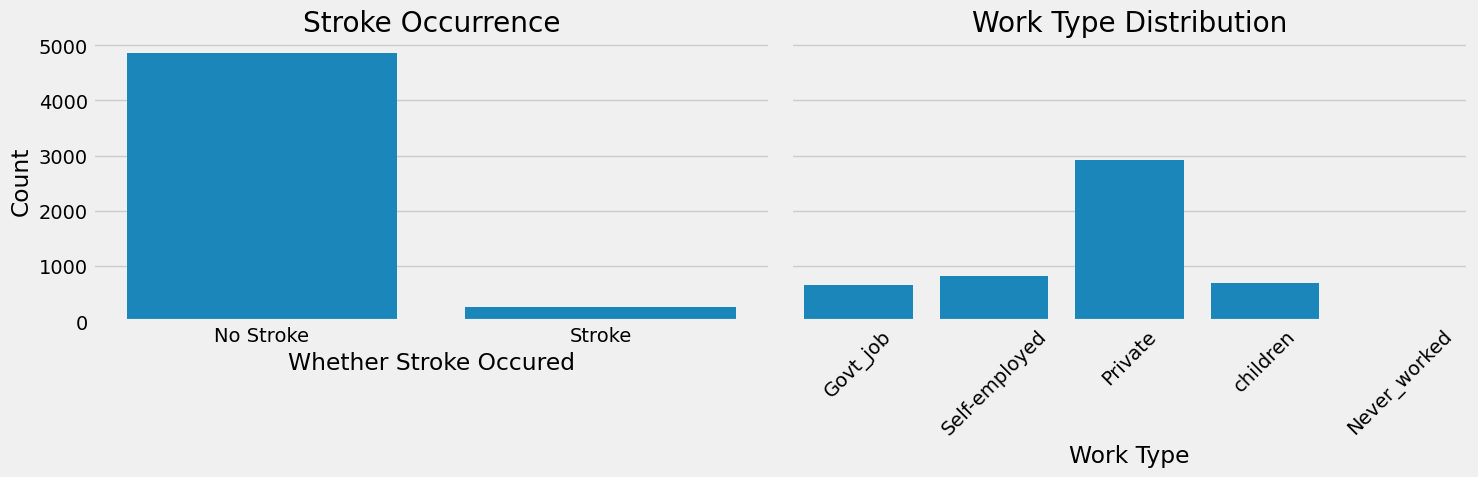

In [ ]:
# plot both stroke and work type distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.countplot(x = 'stroke', data = df, ax = axes[0])
axes[0].set_title('Stroke Occurrence')
axes[0].set_xlabel('Whether Stroke Occured')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Stroke', 'Stroke'])

order = ['Govt_job', 'Self-employed', 'Private', 'children', 'Never_worked']
sns.countplot(x = 'work_type', data=df, order=order, ax=axes[1])
axes[1].set_title('Work Type Distribution')
axes[1].set_xlabel('Work Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#most people in our dataset have not reported a stroke (4861:249). the majority of individuals in our data holds private jobs.

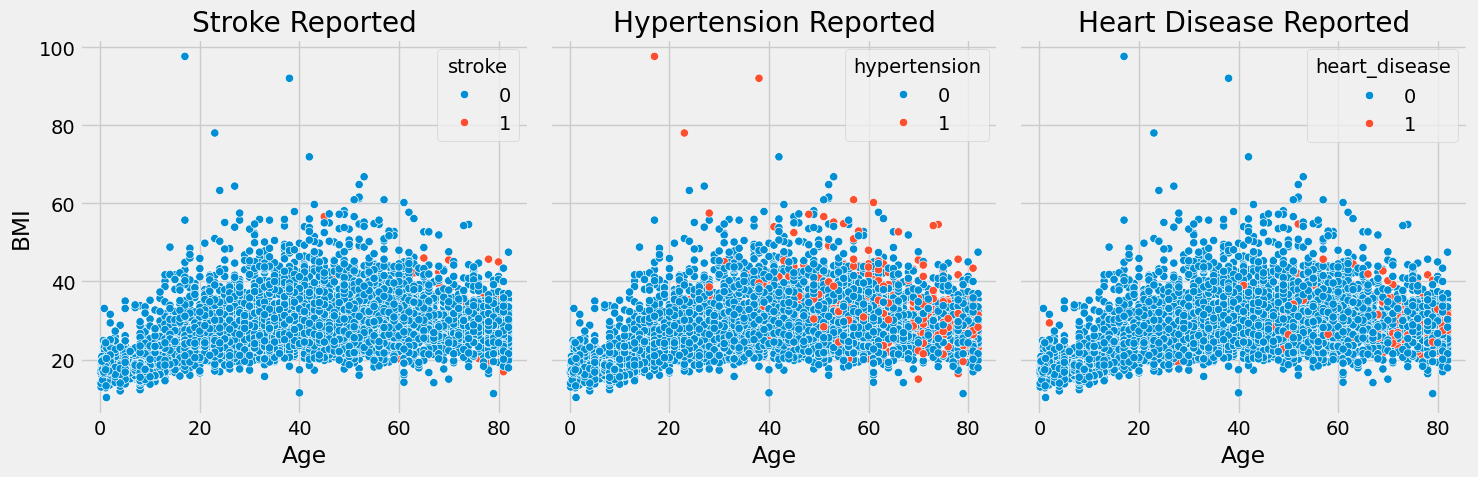

In [84]:
#bmi distribution in relation to reported strokes, hypertension, and heart disease
conditions = [
    ('stroke', 'Stroke Reported'),
    ('hypertension', 'Hypertension Reported'),
    ('heart_disease', 'Heart Disease Reported')
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for ax, (col, title) in zip(axes, conditions):
    sns.scatterplot(data=temp, x='age', y='bmi', hue=col, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Age")
    ax.set_ylabel("BMI")

plt.tight_layout()
plt.show()

#people who have report stroke or conditions leading up to a stroke fall primarily past 40.

In [140]:
#because the dataset is extremely imbalanced we can't observe a correlation as clearly in its current state. in order to fix this, the dataset needs to be downsampled:

#make important variables numeric for heatmap
numeric = temp.copy()
numeric['gender'] = numeric['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})
numeric['ever_married'] = numeric['ever_married'].replace({'Yes': 1, 'No': 0})
numeric['work_type'] = numeric['work_type'].replace({'Private': 2, 'Self-employed': 3, 'Govt_job': 1, 'children': 4, 'Never_worked': 0})
numeric['Residence_type'] = numeric['Residence_type'].replace({'Urban': 0, 'Rural': 1})
numeric['smoking_status'] = numeric['smoking_status'].replace({'Unknown': 0, 'never smoked': 1, 'formerly smoked': 2, 'smokes': 3})

positive_data = numeric[numeric['stroke'] == 1] # holds data for all positive reported strokes
negative_data = numeric[numeric['stroke'] == 0] # holds data for all negative reported strokes

neg_down = negative_data.sample(n = len(positive_data), random_state = 42)
balanced = pd.concat([positive_data, neg_down]).sample(frac = 1, random_state = 42).reset_index(drop = True)
balanced.head(15) # much more randomized

C:\Users\cwang\AppData\Local\Temp\ipykernel_7200\2837737764.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
C:\Users\cwang\AppData\Local\Temp\ipykernel_7200\2837737764.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
C:\Users\cwang\AppData\Local\Temp\ipykernel_7200\2837737764.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,condition,age_group
0,67921,1,5.0,0,0,0,4,0,55.35,22.7,0,0,None,0-19
1,16542,1,60.0,0,0,1,1,0,86.34,22.1,1,0,None,60-69
2,69622,1,8.0,0,0,0,4,0,65.32,18.4,0,0,None,0-19
3,7371,1,80.0,1,0,1,3,1,72.67,28.9,1,1,"Stroke, Hypertension",80+
4,67895,1,82.0,1,1,1,1,0,215.94,27.9,2,1,"Stroke, Hypertension, Heart Disease",80+
5,47269,0,74.0,0,0,1,2,1,219.72,33.7,2,1,Stroke,70-79
6,49130,0,74.0,0,0,1,2,0,98.55,25.6,0,1,Stroke,70-79
7,4639,1,69.0,0,0,1,1,0,82.81,28.0,1,1,Stroke,60-69
8,72414,0,16.0,0,0,0,2,0,134.80,22.4,1,0,None,0-19
9,67880,0,5.0,0,0,0,4,0,148.52,20.6,0,0,None,0-19


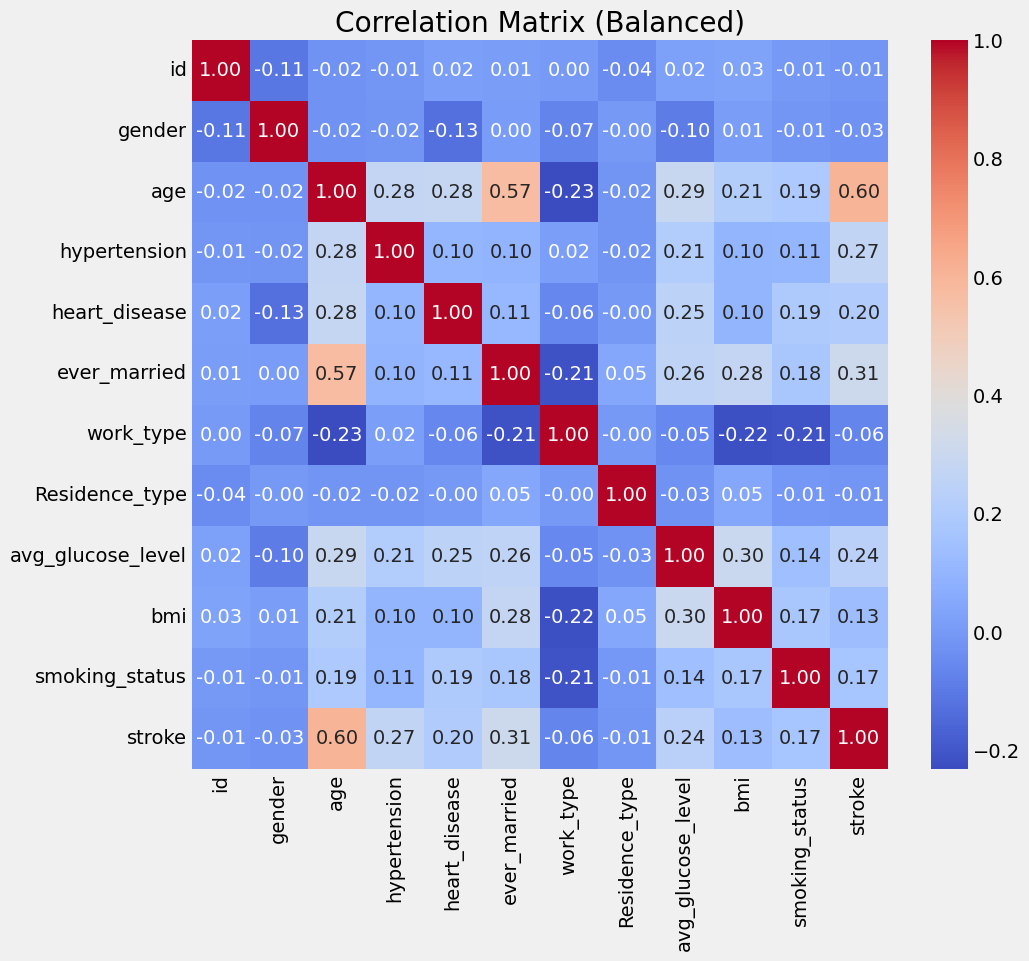

In [ ]:
#plot correlation
plt.figure(figsize=(10, 9))
sns.heatmap(balanced.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Balanced)')
plt.show()

In [120]:
df['Residence_type'].value_counts()
df['smoking_status'].value_counts()
df['condition'].value_counts()

condition
None                                   4251
Hypertension                            381
Heart Disease                           178
Stroke                                  149
Stroke, Hypertension                     53
Hypertension, Heart Disease              51
Stroke, Heart Disease                    34
Stroke, Hypertension, Heart Disease      13
Name: count, dtype: int64